### **1. What does data mean?**

Movie lens is a web based recommender system Our file  contain 1,000,209 anonymous ratings of approximately 3,900 movies 
made by 6,040 MovieLens users who joined MovieLens in 2000.From Visualisation we came to know that users of age group 25-34 are more concerned about giving
ratings to the movies the highest ratings that were given are 4, word 'comedy' is the most commonly used word in movies genre.Action,Drama and Thriller are also among the most occuring words.I think This encapsulates the idea of presence of comedy in large amount in movies genres.The users who watched or rated movies are lies between age(20-30) and from o we came to know that the recommeneded system algorithms that we have to keep in mind are content based because it requires essentials to recommend users like their users id the most movies they watch so for this moviedID and mean ratings given to any movie and collborative based .


importing libraries



In [43]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from scipy import *
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns

In [44]:
df=pd.read_csv('/content/C__Users_Nabeel-pc_Desktop_movies_dataframe_grouplens.csv')

In [45]:
df.head(12)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [47]:
df.shape

(3883, 3)

In [48]:
df.describe()

,MovieID
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [50]:
#on users data
df_users=pd.read_csv("/content/users.csv")

In [51]:
df_users.head(20)

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,2460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,6810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [52]:
df_users.shape

(6040, 5)

In [53]:
df_users.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [54]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [55]:
#Ratings data
df_ratings=pd.read_csv("/content/ratings.csv")
df_ratings.head(20)

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [56]:
df_ratings.shape

(1000209, 4)

In [57]:
df_ratings.describe()

,UserID,MovieID,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [58]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [59]:
#merging of movies,users and ratings dataset
df_merge=pd.merge(df_users,df_ratings,on='UserID',how='left')

In [60]:
df_merge

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109
2,1,F,1,10,48067,914,3,978301968
3,1,F,1,10,48067,3408,4,978300275
4,1,F,1,10,48067,2355,5,978824291
...,...,...,...,...,...,...,...,...
1000204,6040,M,25,6,11106,1091,1,956716541
1000205,6040,M,25,6,11106,1094,5,956704887
1000206,6040,M,25,6,11106,562,5,956704746
1000207,6040,M,25,6,11106,1096,4,956715648


In [61]:
df_merge2=pd.merge(df_merge,df,on='MovieID',how='left')
df_merge2

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,F,1,10,48067,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,F,1,10,48067,914,3,978301968,My Fair Lady (1964),Musical|Romance
3,1,F,1,10,48067,3408,4,978300275,Erin Brockovich (2000),Drama
4,1,F,1,10,48067,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,M,25,6,11106,1091,1,956716541,Weekend at Bernie's (1989),Comedy
1000205,6040,M,25,6,11106,1094,5,956704887,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,M,25,6,11106,562,5,956704746,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,M,25,6,11106,1096,4,956715648,Sophie's Choice (1982),Drama


In [62]:
df_merge2.shape

(1000209, 10)

In [63]:
print(df_merge2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   Gender      1000209 non-null  object
 2   Age         1000209 non-null  int64 
 3   Occupation  1000209 non-null  int64 
 4   Zip-code    1000209 non-null  object
 5   MovieID     1000209 non-null  int64 
 6   Rating      1000209 non-null  int64 
 7   Timestamp   1000209 non-null  int64 
 8   Title       1000209 non-null  object
 9   Genres      1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB
None


In [64]:
print(df_merge2['Genres'].value_counts())

Comedy                       116883
Drama                        111423
Comedy|Romance                42712
Comedy|Drama                  42245
Drama|Romance                 29170
                              ...  
Drama|Romance|Western            29
Children's|Fantasy               27
Comedy|Film-Noir|Thriller         5
Film-Noir|Horror                  2
Fantasy                           1
Name: Genres, Length: 301, dtype: int64


In [65]:
print(df_merge2['Title'].value_counts())

American Beauty (1999)                                      3428
Star Wars: Episode IV - A New Hope (1977)                   2991
Star Wars: Episode V - The Empire Strikes Back (1980)       2990
Star Wars: Episode VI - Return of the Jedi (1983)           2883
Jurassic Park (1993)                                        2672
                                                            ... 
Soft Toilet Seats (1999)                                       1
Terror in a Texas Town (1958)                                  1
Another Man's Poison (1952)                                    1
Little Indian, Big City (Un indien dans la ville) (1994)       1
An Unforgettable Summer (1994)                                 1
Name: Title, Length: 3706, dtype: int64


Continous Columns

In [66]:
num_cols = df_merge2._get_numeric_data().columns
cont_cols = []
for i in num_cols:
  if(len(df_merge2[i].unique())) > int(df_merge2.shape[0]/25):
     cont_cols.append(i)
print (cont_cols)  

['Timestamp']


Categorial Columns

In [67]:
cat_cols = list(set(df_merge2.columns) - set(cont_cols))
cat_cols

['Rating',
 'Title',
 'Occupation',
 'UserID',
 'Zip-code',
 'MovieID',
 'Genres',
 'Gender',
 'Age']

2. **Data Cleaning**

Checking for null and nan values

In [68]:
print(df_merge2.isnull().sum())

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
MovieID       0
Rating        0
Timestamp     0
Title         0
Genres        0
dtype: int64


In [69]:
df_merge2.isna()  #This function is used to detect missing valus. If the values are NA ,NA values get mapped to True Values.Everything get mapped to False values

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1000204,False,False,False,False,False,False,False,False,False,False
1000205,False,False,False,False,False,False,False,False,False,False
1000206,False,False,False,False,False,False,False,False,False,False
1000207,False,False,False,False,False,False,False,False,False,False


In [70]:
df_merge2.isna().any() # return a boolean value for each column .If There is atleast one missing value in that column,the result is True

UserID        False
Gender        False
Age           False
Occupation    False
Zip-code      False
MovieID       False
Rating        False
Timestamp     False
Title         False
Genres        False
dtype: bool

In [71]:
df_merge2.isna().sum() #returns the number of missing values in each column

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
MovieID       0
Rating        0
Timestamp     0
Title         0
Genres        0
dtype: int64

2. outlier detection 

In [72]:
#Check Skewness
for i in cont_cols:
  print(str(i)+' : '+str(df_merge2[i].skew()))

Timestamp : 2.7656911632559553


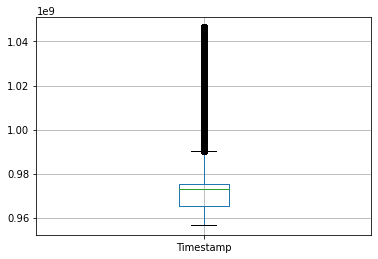

In [73]:
df_merge2.boxplot(column='Timestamp')

2 **outlier handling using flooring and capping**

In [74]:
#Using Quantile flooring  at 5% & 95%
for i in cont_cols:
  #Defning the lower & upper cap/cutoff
  lower_cutoff = df_merge2[i].quantile(0.05)
  upper_cutoff = df_merge2[i].quantile(0.95)
  #Replacing the Outliers from both ends with capped cutoffs
  df_merge2[i] = np.where(df_merge2[i] < lower_cutoff,lower_cutoff,df_merge2[i])
  df_merge2[i] = np.where(df_merge2[i] > upper_cutoff, upper_cutoff,df_merge2[i])
  print('Revised skew after Outlier handling '+str(i)+' : '+str(df_merge2[i].skew()))

Revised skew after Outlier handling Timestamp : 0.716591945994963


since the skewness value came between -1 and 1 it means the outliers got reduced to a larger extent.

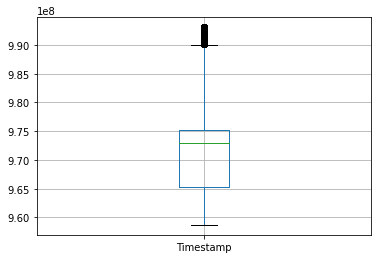

In [75]:
df_merge2.boxplot(column='Timestamp')

Since Age Ratings and are contain numerical data so we check for the outliers in them.



As we know that if skewness value lies between -1 and 1 then the data is normally distributed and any major deviation from this range indicates the presence of extreme values.

In [76]:
print(df_merge2['Age'].skew())
df_merge2['Age'].describe()

0.39847140167374695


count    1.000209e+06
mean     2.973831e+01
std      1.175198e+01
min      1.000000e+00
25%      2.500000e+01
50%      2.500000e+01
75%      3.500000e+01
max      5.600000e+01
Name: Age, dtype: float64

In [77]:
print(df_merge2['Rating'].skew())
df_merge2['Rating'].describe()

-0.5536098874940055


count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

So there are no outliers in rating and in age since it's skew
values lies between -1 and 1

Again checking for missing data after handling outliers

### **Handling missing data**

In [78]:
#Missing Features
#Remove a column when populated < 50%
mis_data =pd.DataFrame(df_merge2.count(axis=0)).reset_index()
mis_data.columns =["Feature","Total_Populated"]
mis_data =mis_data[(mis_data['Total_Populated'] < df_merge2.shape[0])]
mis_data

,Feature,Total_Populated


In [79]:
#Checking Sparse rows , if >= 33.3% of columns of a record is not populated then remove the record itself
# Found no record Sparsely populated
rows_missing = df_merge2.isnull().sum(axis=1).reset_index() 
rows_missing.columns = ['row','mis_cnt']
rows_missing[(rows_missing['mis_cnt'] > int(df_merge2.shape[1]/3))]

,row,mis_cnt


In [80]:
#Populate the Missing values in Categorical columns with Mode value
#Mode value for every field
df_merge2.mode().iloc[0]

UserID                          4169
Gender                             M
Age                               25
Occupation                         4
Zip-code                       94110
MovieID                         2858
Rating                             4
Timestamp                9.58704e+08
Title         American Beauty (1999)
Genres                        Comedy
Name: 0, dtype: object

In [81]:
# first we gonna check how many categorial columns are there with missing values
#Categorical Columns with missing values
df_merge2[cat_cols].isnull().sum()

Rating        0
Title         0
Occupation    0
UserID        0
Zip-code      0
MovieID       0
Genres        0
Gender        0
Age           0
dtype: int64


**since  there are no categorial columns with missing so we are not gonna handle it.**





Populate the Missing Values in Continous Columns value with Median

In [82]:
df_merge2.median()

UserID             3070.0
Age                  25.0
Occupation            7.0
MovieID            1835.0
Rating                4.0
Timestamp     973018006.0
dtype: float64

In [83]:
#Check which of continous columns have missing value
df_merge2[cont_cols].isnull().sum()

Timestamp    0
dtype: int64

since there are no missing values so we are not gonna handle it

In [84]:
'''#Populate Continous with Median
for cols in cont_cols:
  if ( df_merge2[cols].isnull().sum() > 0):
    df_merge2[cols] = df_merge2[cols].fillna(df_merge2[cols].median())'''#This is just to show how we replace missing values with median for continuous columns 

'#Populate Continous with Median\nfor cols in cont_cols:\n  if ( df_merge2[cols].isnull().sum() > 0):\n    df_merge2[cols] = df_merge2[cols].fillna(df_merge2[cols].median())'

In [85]:
#Check which of continous columns have missing value
df_merge2[cont_cols].isnull().sum()

Timestamp    0
dtype: int64

## **Data Analysis**

In [86]:
#displays high rated movies
high_rated=df_merge2['Rating']>4

In [87]:
df_merge2[high_rated][['Title','Genres','Rating']].head(30)

,Title,Genres,Rating
0,One Flew Over the Cuckoo's Nest (1975),Drama,5
4,"Bug's Life, A (1998)",Animation|Children's|Comedy,5
6,Ben-Hur (1959),Action|Adventure|Drama,5
7,"Christmas Story, A (1983)",Comedy|Drama,5
10,Beauty and the Beast (1991),Animation|Children's|Musical,5
14,"Sound of Music, The (1965)",Musical,5
18,Awakenings (1990),Drama,5
22,Back to the Future (1985),Comedy|Sci-Fi,5
23,Schindler's List (1993),Drama|War,5
25,Pocahontas (1995),Animation|Children's|Musical|Romance,5


In [88]:
#displays low rated movies
#displays high rated movies
high_rated=df_merge2['Rating']<4
df_merge2[high_rated][['Title','Genres','Rating']].head(30)

,Title,Genres,Rating
1,James and the Giant Peach (1996),Animation|Children's|Musical,3
2,My Fair Lady (1964),Musical|Romance,3
5,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,3
16,Tarzan (1999),Animation|Children's,3
20,Pleasantville (1998),Comedy,3
21,Wallace & Gromit: The Best of Aardman Animatio...,Animation,3
24,Meet Joe Black (1998),Romance,3
29,"Close Shave, A (1995)",Animation|Comedy|Thriller,3
56,Courage Under Fire (1996),Drama|War,3
60,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Fantasy|Sci-Fi,3


In [89]:
#top 25 most rated movies
most_rated=df_merge2.groupby('Title').size().sort_values(ascending=False)[:25]
most_rated

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

In [90]:
#which movies are most highly rated according to average rating
movie_stats=df_merge2.groupby('Title').agg({'Rating':[np.size,np.mean]})
movie_stats.head()

Rating          
                                size      mean
Title                                         
$1,000,000 Duck (1971)            37  3.027027
'Night Mother (1986)              70  3.371429
'Til There Was You (1997)         52  2.692308
'burbs, The (1989)               303  2.910891
...And Justice for All (1979)    199  3.713568

In [91]:
movie_stats.sort_values([('Rating','mean')],ascending=False).head(25)

Rating          
                                                     size      mean
Title                                                              
Ulysses (Ulisse) (1954)                                 1  5.000000
Lured (1947)                                            1  5.000000
Follow the Bitch (1998)                                 1  5.000000
Bittersweet Motel (2000)                                1  5.000000
Song of Freedom (1936)                                  1  5.000000
One Little Indian (1973)                                1  5.000000
Smashing Time (1967)                                    2  5.000000
Schlafes Bruder (Brother of Sleep) (1995)               1  5.000000
Gate of Heavenly Peace, The (1995)                      3  5.000000
Baby, The (1973)                                        1  5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                     5  4.800000
Lamerica (1994)                                         8  4.750000
Apple, The (Sib) (1998)                                 9  4.666667
Sanjuro (1962)                                         69  4.608696
Seven Samurai (The Magnificent Seven) (Shichini...    628  4.560510
Shawshank Redemption, The (1994)                     2227  4.554558
Godfather, The (1972)                                2223  4.524966
Close Shave, A (1995)                                 657  4.520548
Usual Suspects, The (1995)                           1783  4.517106
Schindler's List (1993)                              2304  4.510417
Wrong Trousers, The (1993)                            882  4.507937
Dry Cleaning (Nettoyage � sec) (1997)                   2  4.500000
Inheritors, The (Die Siebtelbauern) (1998)              2  4.500000
Mamma Roma (1962)                                       2  4.500000
Bells, The (1926)                                       2  4.500000

In [92]:
#slicing out columns to display only title and genres columns from df_merge2.csv
df_merge2[['Title','Genres']].head()

,Title,Genres
0,One Flew Over the Cuckoo's Nest (1975),Drama
1,James and the Giant Peach (1996),Animation|Children's|Musical
2,My Fair Lady (1964),Musical|Romance
3,Erin Brockovich (2000),Drama
4,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [93]:
df_merge2.shape

(1000209, 10)

## **Data Visualisation**

### **univariate Analysis**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdea3ff4710>,
      dtype=object)

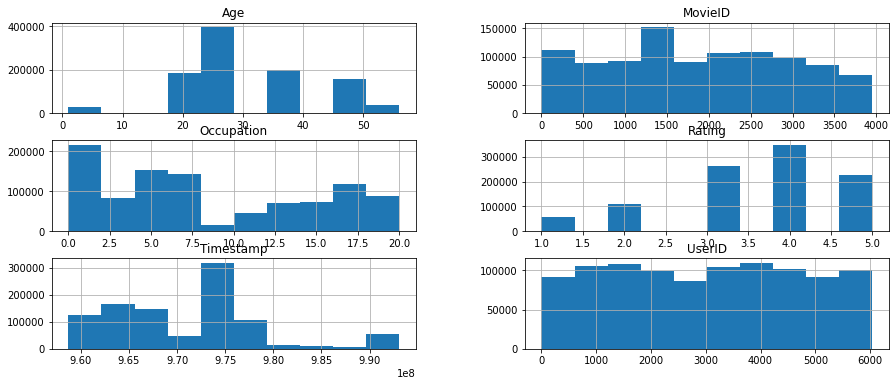

In [94]:
#Takes all numerical data (continous or categorical) and plots
df_merge2.hist(figsize=[15,6])

Inferences


*   Frequency is highest for rating 4 and least for 1
*   Frequency is Highest for age group approx(22-29) least for below 10

*   Frequency for 0 occupation is highest i.e for('others' or 'not specified' and least from (7.5-10.0)
*   Frequency of MovieID and UserID are continuouly increases or decreases.





In [95]:
len(df_merge2['Title'])

1000209

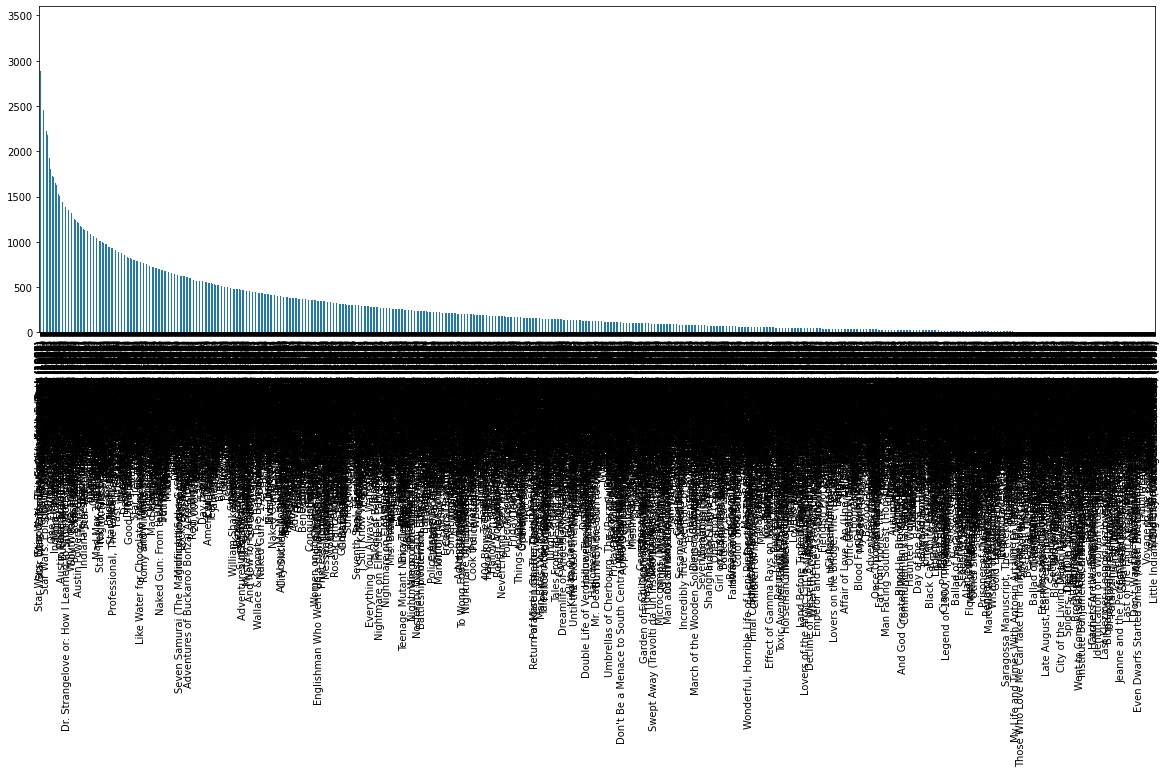

In [96]:
df_merge2['Title'].value_counts().plot.bar(figsize=[20,6])

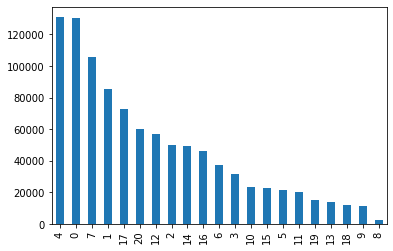

In [97]:
df_merge2['Occupation'].value_counts().plot.bar()

Inferences


*   Highest frequency is for Ocuupation  4 i.e('col')
*   Lowest frequency is for Occupation 8 i.e('Farmer')

The Trend that i am observing is that the frequency of observation highest at for and then it is continuously decreases. 







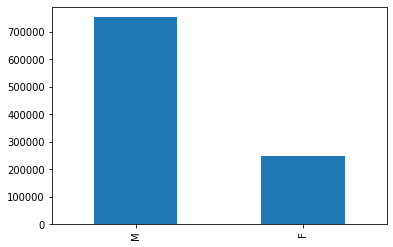

In [98]:
df_merge2['Gender'].value_counts().plot.bar()

Inference


*   Frequency of number of users is higher for male as compare to female.




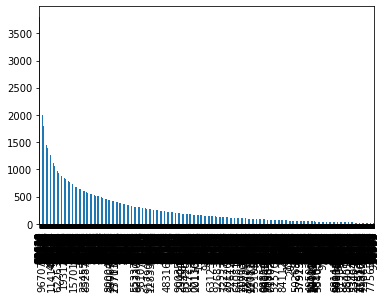

In [99]:
df_merge2['Zip-code'].value_counts().plot.bar()

In [100]:
# define a function that counts the number of times each genre appear
def count_word(df1,ref_col,liste):
  keyword_count=dict()
  for s in liste:
    keyword_count[s]=0
  for liste_keywords in df1[ref_col].str.split('|'):
    if type(liste_keywords)==float and pd.isnull(liste_keywords):
      continue
    for s in liste_keywords:
      if pd.notnull(s):
        keyword_count[s]+=1
  keyword_occurrences=[]  #convert dictionary into list to sort the keywords by frequency
  for k,v in keyword_count.items():
    keyword_occurrences.append([k,v])
  keyword_occurrences.sort(key=lambda x:x[1],reverse=True)
  return keyword_occurrences,keyword_count

In [101]:
# making census of the genres
genre_labels=set()
for s in df_merge2['Genres'].str.split('|').values:
  genre_labels=genre_labels.union(set(s))

In [102]:
#counting how many times each genres occur
keyword_occurences,dum=count_word(df_merge2,'Genres',genre_labels)
keyword_occurences

[['Comedy', 356580],
 ['Drama', 354529],
 ['Action', 257457],
 ['Thriller', 189680],
 ['Sci-Fi', 157294],
 ['Romance', 147523],
 ['Adventure', 133953],
 ['Crime', 79541],
 ['Horror', 76386],
 ["Children's", 72186],
 ['War', 68527],
 ['Animation', 43293],
 ['Musical', 41533],
 ['Mystery', 40178],
 ['Fantasy', 36301],
 ['Western', 20683],
 ['Film-Noir', 18261],
 ['Documentary', 7910]]

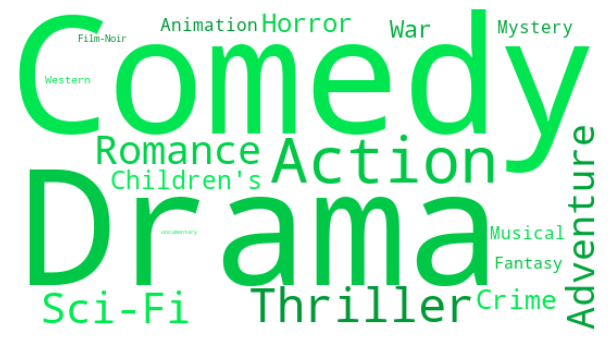

In [103]:
from wordcloud import WordCloud, STOPWORDS
# Function that control the color of the words
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


#Finally, the result is shown as a wordcloud:
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='white', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In above the word '**comedy**' is the most commonly used word in movies genre.Action,Drama and Thriller are also among the most occuring words.I think This encapsulates the idea of  presence of comedy in large amount in movies genres.  

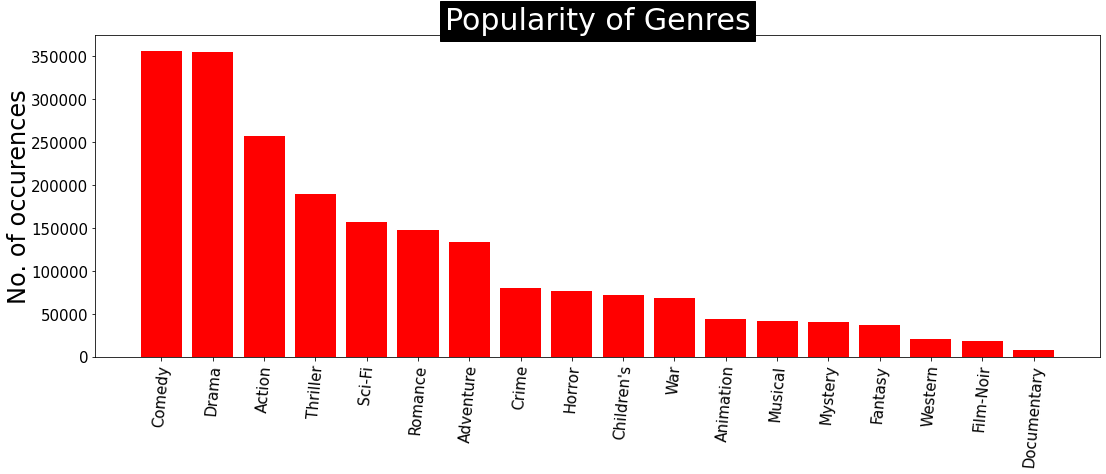

In [104]:
# lets display the same result in the histogram
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

In above the word 'comedy' is the most commonly used word in movies genre.Action,Drama and Thriller are also among the most occuring words.I think This encapsulates the idea of presence of comedy in large amount in movies genres.


Least occurent genres are Documentary,film-Noir,Western.



### **Bivariate Analysis**

Categorial data types

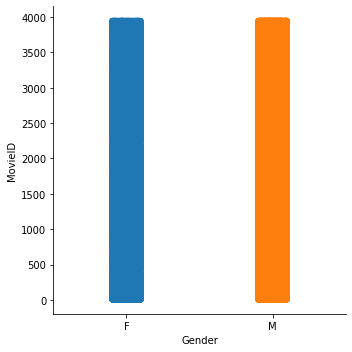

In [105]:
sns.catplot(x='Gender',y='MovieID',data=df_merge2)

Inferences

from above plot we conclude that MovieID 4000  was being searched by equal no of males and females.

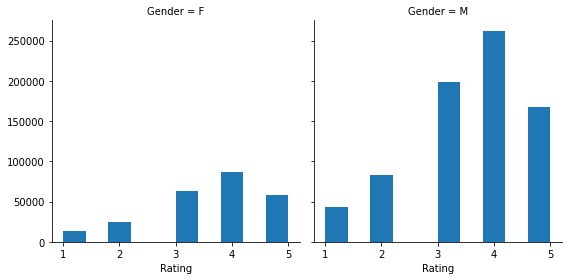

In [106]:
fn = sns.FacetGrid(df_merge2,col='Gender',height=4, aspect=1)
fn = fn.map(plt.hist,"Rating")

Inferences


*   First we conclude that highest rating that was given to any movie is 4 and that too by Males in large number in comparison to Females.
*  Secondly 2nd most Ratings that was given are 5 and that too also by males in large number and that also by males in comparision to females.


*   Lowest number of Ratings are 1 and it is given in least amount by females in comparison to males.






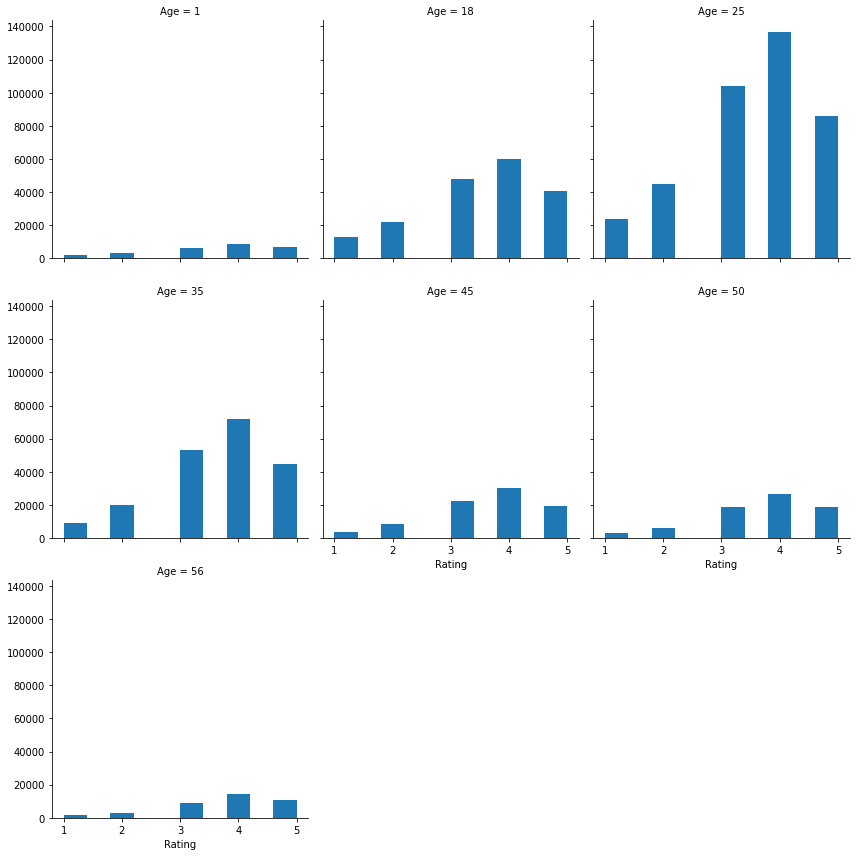

In [107]:
fn = sns.FacetGrid(df_merge2,col='Age',col_wrap=3,height=4, aspect=1)
fn = fn.map(plt.hist,"Rating")

Inferences

*   The users of age group 25-34 are most concerned about giving 
Rating.
*   The users of age group under 18 and 56+ are least concerned about giving Rating.


 
 *   The Rating given by age group 18-24 and 35-44 are almost same and thsere are users who are concerned about giving ratings after age group 25-34 .
  

*   similarly for age group 45-49 and 50-55










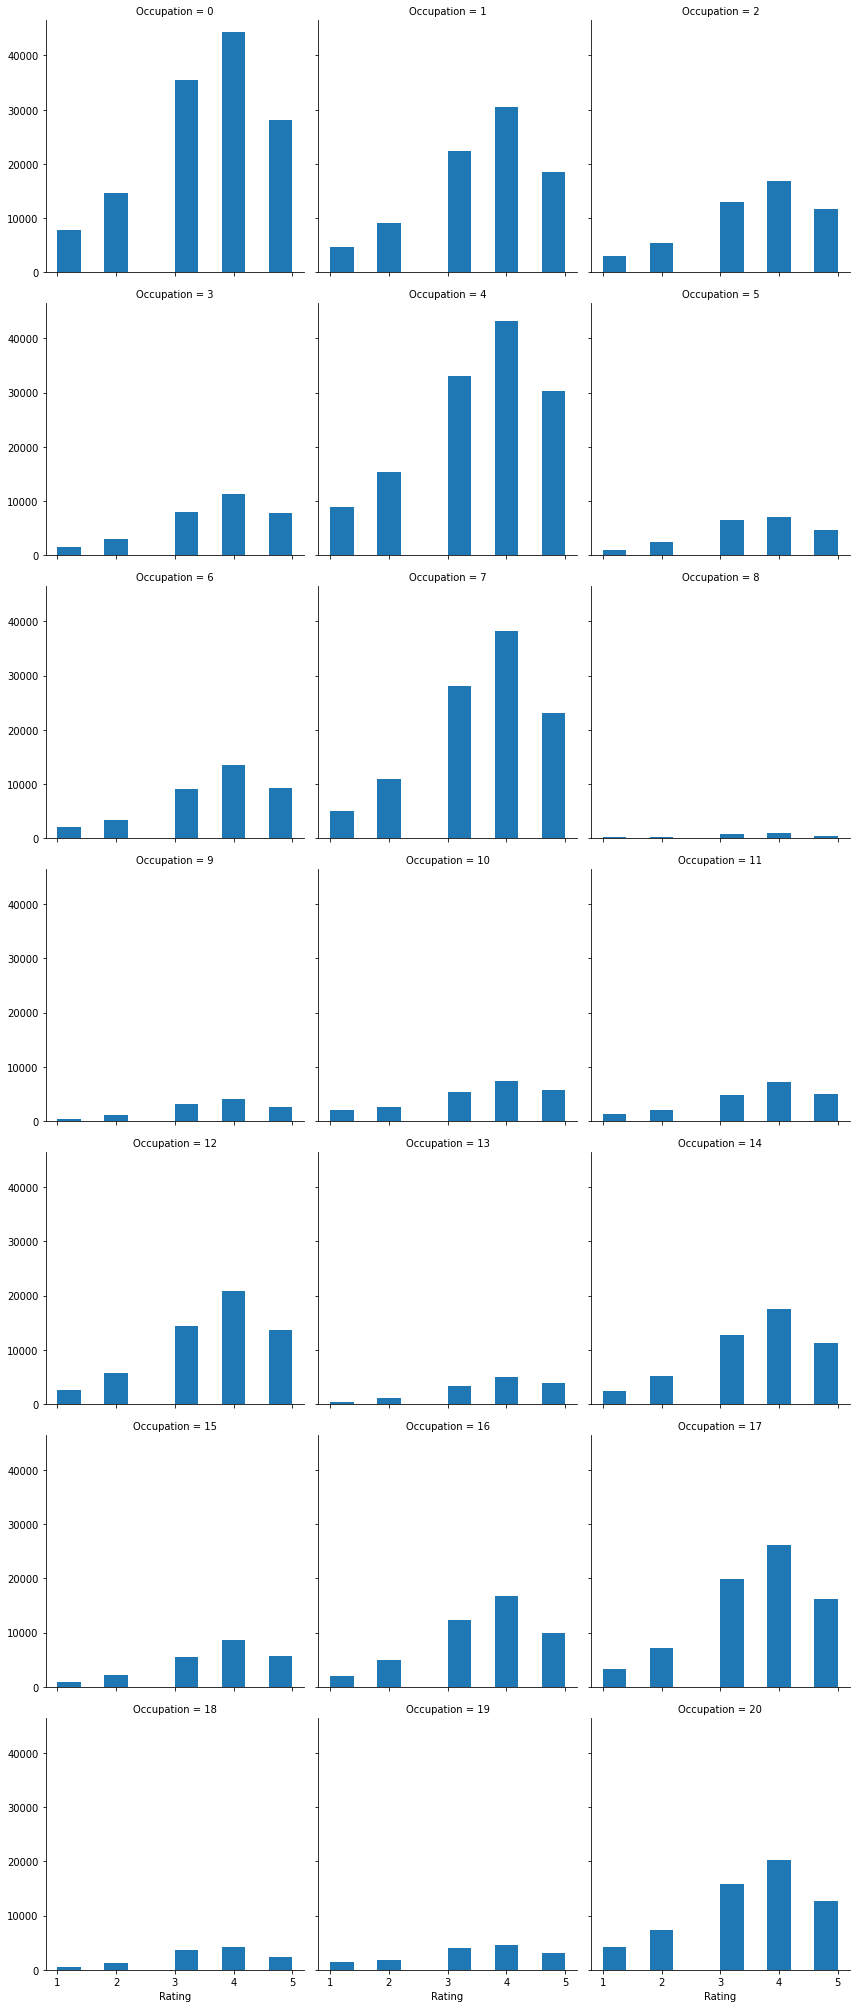

In [108]:
fn = sns.FacetGrid(df_merge2,col='Occupation',col_wrap=3,height=4, aspect=1)
fn = fn.map(plt.hist,"Rating")



*   Ratings are Highest for occupation 0 and 4

---


*   2nd highest for occupation 7

 

*   Ratings are Least for occupation 8
*   Ratings given are 3rd highest by occupation 1




* Ratings given are almost same for occupation 3 and 6 



Text(0.5, 0, 'age')

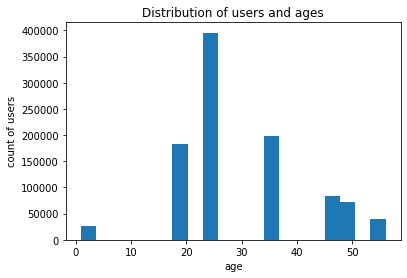

In [109]:
#which movies are most controversial among different ages
df_merge2.Age.plot.hist(bins=20)
plt.title("Distribution of users and ages")
plt.ylabel('count of users')
plt.xlabel('age')

The above distribution shows that the most of the users are 25 years old

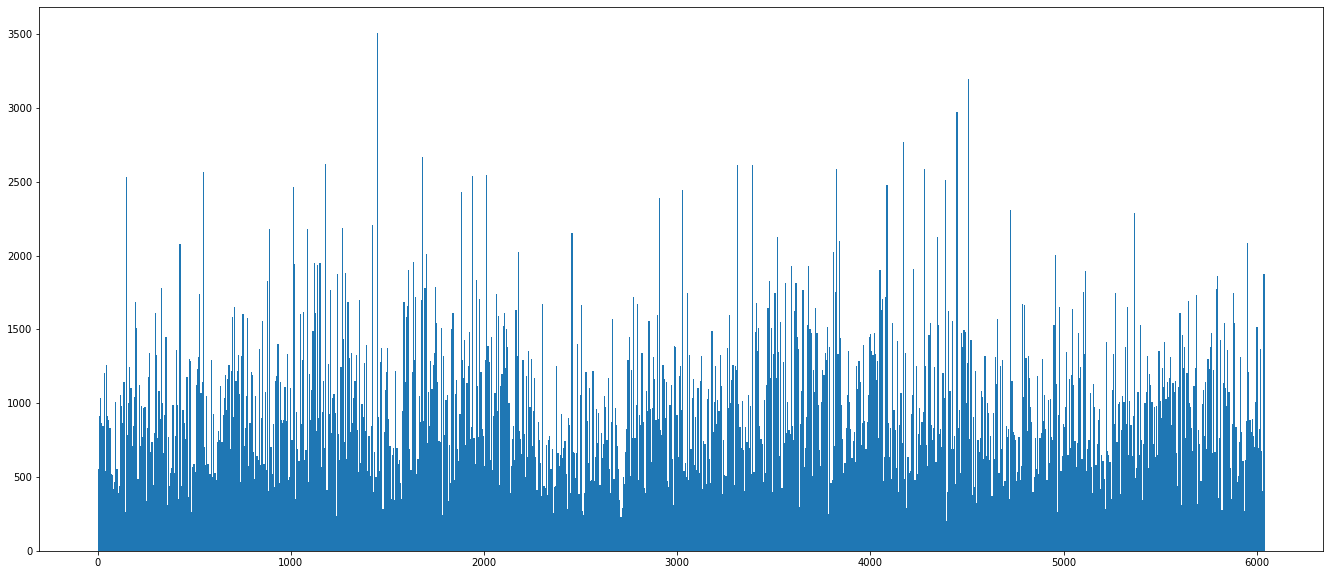

In [110]:
#user ratings 
plt.figure(figsize=(23,10))
plt.hist(x=[df_ratings.UserID],bins=1000) #it gives the plot between userid and ratings
plt.show()

3.**Keeping in mind the broad categories of recommendation system algorithms,what features you will need and why?**


In [111]:
df_merge2.columns

Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code', 'MovieID',
       'Rating', 'Timestamp', 'Title', 'Genres'],
      dtype='object')

Toystory data

In [112]:
toystory_data = df_ratings[df_ratings.MovieID==1]
toystory_data.head(10)

,UserID,MovieID,Rating,Timestamp
40,1,1,5,978824268
469,6,1,4,978237008
581,8,1,4,978233496
711,9,1,5,978225952
837,10,1,5,978226474
1966,18,1,4,978154768
2276,19,1,5,978555994
2530,21,1,3,978139347
2870,23,1,4,978463614
3405,26,1,3,978130703


In [113]:
toystory_data.groupby('Rating').size()

Rating
1     16
2     61
3    345
4    835
5    820
dtype: int64

In [114]:
toystory_data_group = toystory_data.groupby('Rating')
toystory_data_group.agg({'Rating':'mean'})

,Rating
Rating,
1,1
2,2
3,3
4,4
5,5


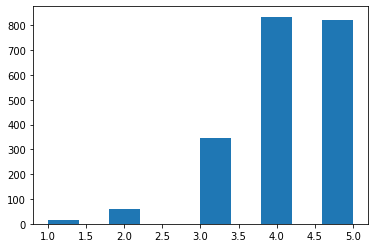

In [115]:
plt.hist(x=toystory_data['Rating'])
plt.show()

The above plot shows that the movie 'Toystory' has got 4 ** (stars) maximum The average rating of this movie is

In [116]:
#Viewership by Age for Toystory
viewership = pd.merge(df_ratings, df_users, how='left', left_on=['UserID'], right_on=['UserID'])

In [117]:
viewership.shape

(1000209, 8)

In [118]:
df_ratings.shape

(1000209, 4)

In [119]:
viewership.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [120]:
#select only 'Toystory' data
viewership_of_toystory = viewership[viewership['MovieID'] == 1]
viewership_of_toystory.shape

(2077, 8)

In [121]:
viewership_of_toystory.groupby('Age').size()

Age
1     112
18    448
25    790
35    423
45    143
50    108
56     53
dtype: int64

In [123]:
#Top 25 movies by viewership rating
movie_rating = df_ratings.groupby(['MovieID'], as_index=False)
average_movie_ratings = movie_rating.agg({'Rating':'mean'})
top_25_movies = average_movie_ratings.sort_values('Rating', ascending=False).head(25)
top_25_movies

,MovieID,Rating
926,989,5.000000
3635,3881,5.000000
1652,1830,5.000000
3152,3382,5.000000
744,787,5.000000
3054,3280,5.000000
3367,3607,5.000000
3010,3233,5.000000
2955,3172,5.000000
3414,3656,5.000000


In [125]:
#The below list shows top 25 movies by viewership data
pd.merge(top_25_movies, df, how='left', left_on=['MovieID'], right_on=['MovieID'])

,MovieID,Rating,Title,Genres
0,989,5.000000,Schlafes Bruder (Brother of Sleep) (1995),Drama
1,3881,5.000000,Bittersweet Motel (2000),Documentary
2,1830,5.000000,Follow the Bitch (1998),Comedy
3,3382,5.000000,Song of Freedom (1936),Drama
4,787,5.000000,"Gate of Heavenly Peace, The (1995)",Documentary
5,3280,5.000000,"Baby, The (1973)",Horror
6,3607,5.000000,One Little Indian (1973),Comedy|Drama|Western
7,3233,5.000000,Smashing Time (1967),Comedy
8,3172,5.000000,Ulysses (Ulisse) (1954),Adventure
9,3656,5.000000,Lured (1947),Crime


In [126]:
#Rating of userid = 2696
user_rating_data = df_ratings[df_ratings['UserID']==2696]
user_rating_data.head()

,UserID,MovieID,Rating,Timestamp
440667,2696,1258,4,973308710
440668,2696,1270,2,973308676
440669,2696,1617,4,973308842
440670,2696,1625,4,973308842
440671,2696,1644,2,973308920


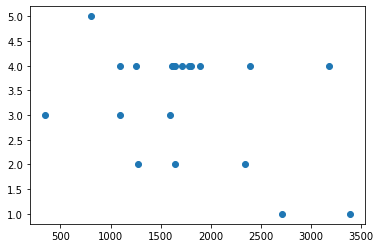

In [127]:
# plotting the above data
plt.scatter(x=user_rating_data['MovieID'], y=user_rating_data['Rating'])
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 2696.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 2696.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 2696.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])


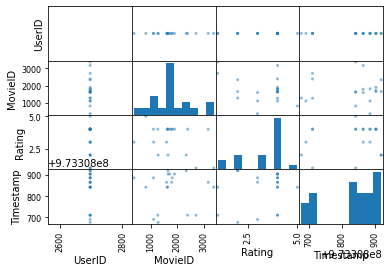

In [128]:
from pandas.plotting import scatter_matrix
scatter_matrix(user_rating_data)
plt.show()

Data preparation

In [129]:
few_viewership = viewership.head(500)
few_viewership.shape

(500, 8)

In [130]:
few_viewership.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [131]:
# preprocess data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(few_viewership['Age'])
x_age = le.transform(few_viewership['Age'])
x_age

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [132]:
le.fit(few_viewership['Occupation'])
x_occ = le.transform(few_viewership['Occupation'])
x_occ

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [133]:
le.fit(few_viewership['MovieID'])
x_movieid = le.transform(few_viewership['MovieID'])
x_movieid

array([130,  78,  95, 374, 280, 132, 156, 321,  71,  96,  72,  98, 287,
       330, 107, 318, 304, 251, 355, 319, 274,  80, 154,  61, 278,  12,
       119, 211, 186,  84, 271, 364, 189,  67, 231,  86, 226, 103, 316,
        18,   0, 243, 244, 305,  29, 104, 105, 135, 252,  62, 359,  74,
       145, 161, 346, 184,  75, 264,  76, 266, 302, 121, 329, 379, 136,
       222, 205, 137, 392, 326, 342, 139, 355,  49, 260, 356, 357, 343,
       148, 194,  33, 265, 347,  92,  44, 149, 360, 185, 158, 127, 366,
       367, 368,  17, 267, 293, 225, 380,  68, 207, 398, 323, 237, 100,
       227, 324, 140, 252,  60,  50, 272,  30, 170, 113, 403,  54, 173,
       255, 151, 162, 130, 224, 163, 279, 372, 289,  69, 131, 187,  83,
       133,  70, 281,  15, 308, 297, 234, 286, 407, 239, 193, 413, 240,
       241,  28, 122, 242,  20,   3,  21, 274, 115,  46, 294,  39,  51,
       118,  97,  52, 181, 376, 166, 378, 353,  85,  56, 312, 247, 244,
       220, 331, 248,  36, 135, 246, 400, 143,  41, 144, 145, 41

In [134]:
few_viewership['New Age'] = x_age
few_viewership['New Occupation'] = x_occ
few_viewership['New MovieID'] = x_movieid

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [135]:
# Feature Selection
x_input = few_viewership[['New Age','New Occupation','New MovieID']]
y_target = few_viewership['Rating']

In [136]:
x_input.head()

,New Age,New Occupation,New MovieID
0,0,2,130
1,0,2,78
2,0,2,95
3,0,2,374
4,0,2,280


In [137]:
#Evaluate Algorithms
# Split-out validation dataset
x_train, x_test, y_train, y_test = train_test_split(x_input, y_target, test_size=0.25)

In [138]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((375, 3), (125, 3), (375,), (125,))

In [139]:
from sklearn.linear_model import LogisticRegression
logitReg = LogisticRegression()
lm = logitReg.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [140]:
result = logitReg.predict(x_test)

In [141]:
estimated = pd.Series(result, name='Estimated Values')

In [142]:
final_result = pd.concat([y_test, estimated], axis=1)

In [143]:
# Test options and evaluation metric
print (accuracy_score(y_test, result))
print (confusion_matrix(y_test, result))
print (classification_report(y_test, result))

0.376
[[ 0  0  0  7  0]
 [ 0  0  1  7  0]
 [ 0  0 11 17  5]
 [ 0  0 12 33  8]
 [ 0  0  8 13  3]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         8
           3       0.34      0.33      0.34        33
           4       0.43      0.62      0.51        53
           5       0.19      0.12      0.15        24

    accuracy                           0.38       125
   macro avg       0.19      0.22      0.20       125
weighted avg       0.31      0.38      0.33       125



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy of above matrix is 37%

No handles with labels found to put in legend.


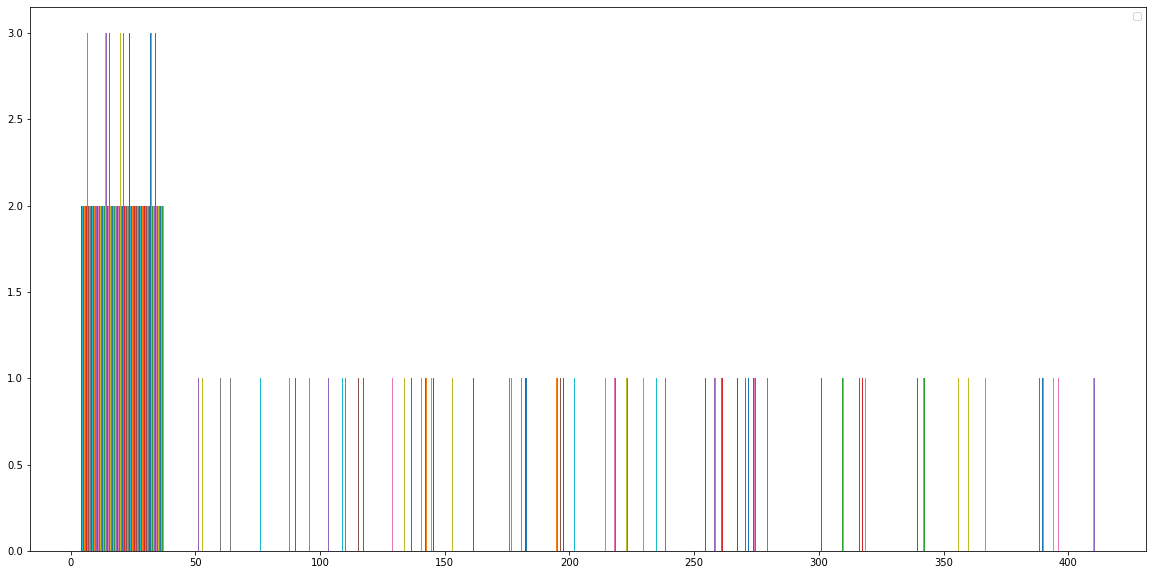

In [144]:
# Plot the histogram
#Not able to visualise anything from this graph
plt.figure(figsize=(20,10))
plt.hist(x=x_input)
plt.legend()
plt.show() 

In [145]:
# Spot-Check Algorithms
seed = 7
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.309175 (0.102751)
LDA: 0.316856 (0.101469)
KNN: 0.295946 (0.067004)
CART: 0.220982 (0.039409)
NB: 0.298293 (0.094609)
SVM: 0.346373 (0.090053)


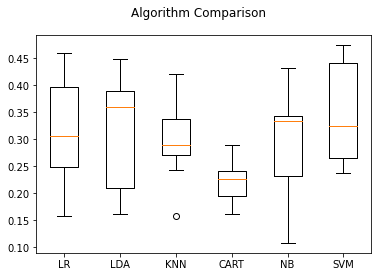

In [146]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

From above algorithms and with the help of data visualisation I would conclude that the features that are necessary for my recommendation sytem are user id,age,Movieid,occupation and genres.

Because features like movie id,Genres,userid are helpful in content based filtering in order to predict target as a ratings whereas userid,movie id and ratings are helpful in collaborative based filtering which uses clustering to divide clusters into similar and unsimilar users on the bases of ratings given.

